--- Running All Analysis Steps --- 
DEBUG: Axiom client object created (credentials likely loaded from env).
2025-05-07 23:34:17,877 - JustTheGoodStuffNotebook - INFO - 712195783:43 - Imports and setup complete.

--- Optional Setup & Pipeline Execution ---
Setup execution skipped (run_setup=False).

Pipeline execution skipped (run_pipeline=False).
Setup and Pipeline execution skipped (set flags in cell to execute).

--- Connecting to Supabase ---
2025-05-07 23:34:17,911 - JustTheGoodStuffNotebook - INFO - 712195783:110 - Supabase client initialized successfully.
2025-05-07 23:34:17,912 - JustTheGoodStuffNotebook - INFO - 712195783:117 - Supabase client initialized status: True

--- Loading Data ---
2025-05-07 23:34:17,913 - JustTheGoodStuffNotebook - INFO - 712195783:125 - Fetching data from cleaned_customer_data... (*)
2025-05-07 23:34:18,260 - JustTheGoodStuffNotebook - INFO - 712195783:129 - Successfully fetched 60 rows from cleaned_customer_data.
2025-05-07 23:34:18,263 - JustTheGo

,customer_id,age,annual_income,total_transactions,region,cleaned_at,pattern_id
0,1,25,50000.0,10,Aztec,2025-05-07T17:48:11.900507+00:00,4
1,2,30,75000.0,25,Indus,2025-05-07T17:48:11.900507+00:00,1
2,3,40,60000.0,15,Celtic,2025-05-07T17:48:11.900507+00:00,0
3,4,22,45000.0,8,Nomad,2025-05-07T17:48:11.900507+00:00,4
4,5,35,90000.0,30,Aztec,2025-05-07T17:48:11.900507+00:00,2



--- Merged Data Info: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         60 non-null     object  
 1   age                 60 non-null     Int64   
 2   annual_income       60 non-null     float64 
 3   total_transactions  60 non-null     Int64   
 4   region              60 non-null     object  
 5   cleaned_at          60 non-null     object  
 6   pattern_id          60 non-null     category
dtypes: Int64(2), category(1), float64(1), object(3)
memory usage: 3.3+ KB
2025-05-07 23:34:18,719 - JustTheGoodStuffNotebook - INFO - 712195783:173 - Data merging complete. Final merged shape: (60, 7)

--- Segment Analysis: Sizes ---
Segment Sizes (Value Counts):


pattern_id
0     6
1    10
2    12
3     6
4    18
5     8
Name: count, dtype: int64

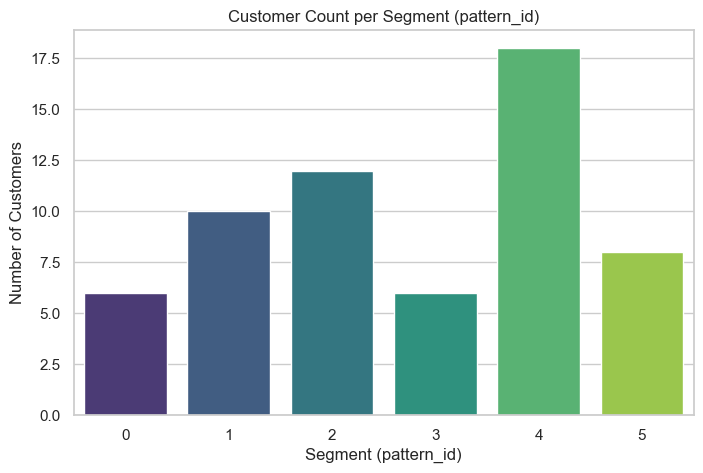


--- Segment Analysis: Numerical Features ---
Summary Statistics by Segment:


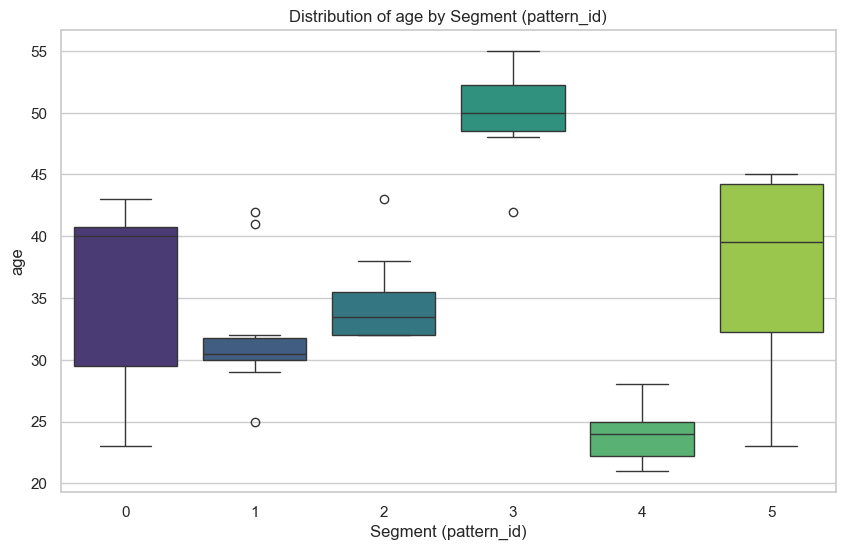

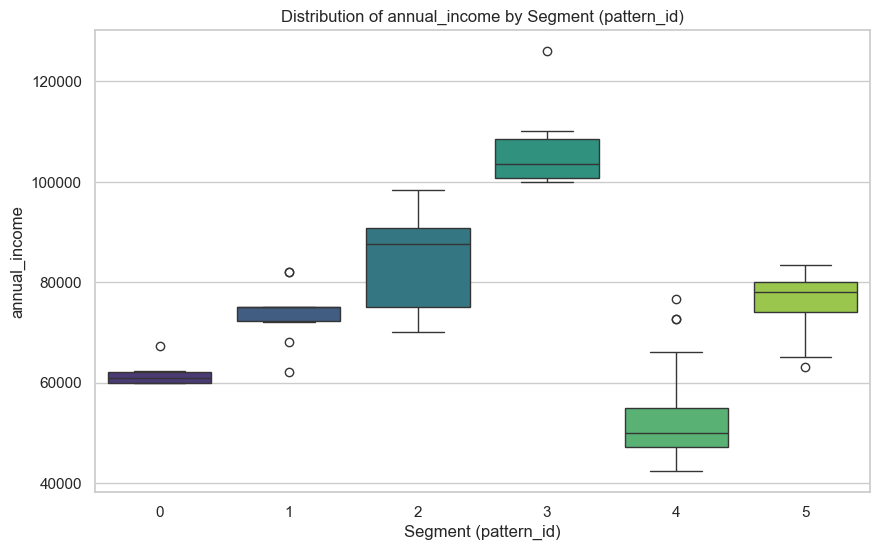

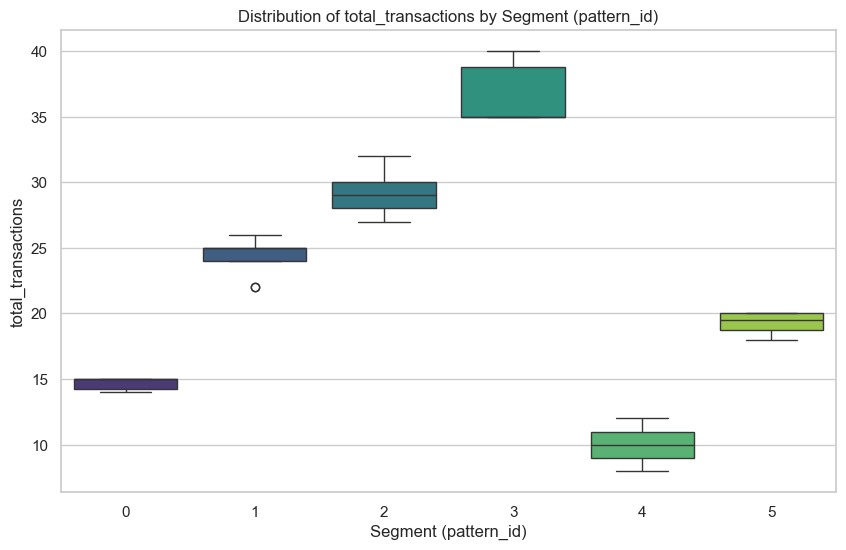


--- Segment Analysis: Region Distribution ---
Region Distribution (%) within each Segment:


region,Aztec,Celtic,Indus,Nomad
pattern_id,,,,
0,0.0%,100.0%,0.0%,0.0%
1,0.0%,0.0%,40.0%,60.0%
2,83.3%,0.0%,16.7%,0.0%
3,33.3%,0.0%,66.7%,0.0%
4,22.2%,0.0%,27.8%,50.0%
5,0.0%,100.0%,0.0%,0.0%


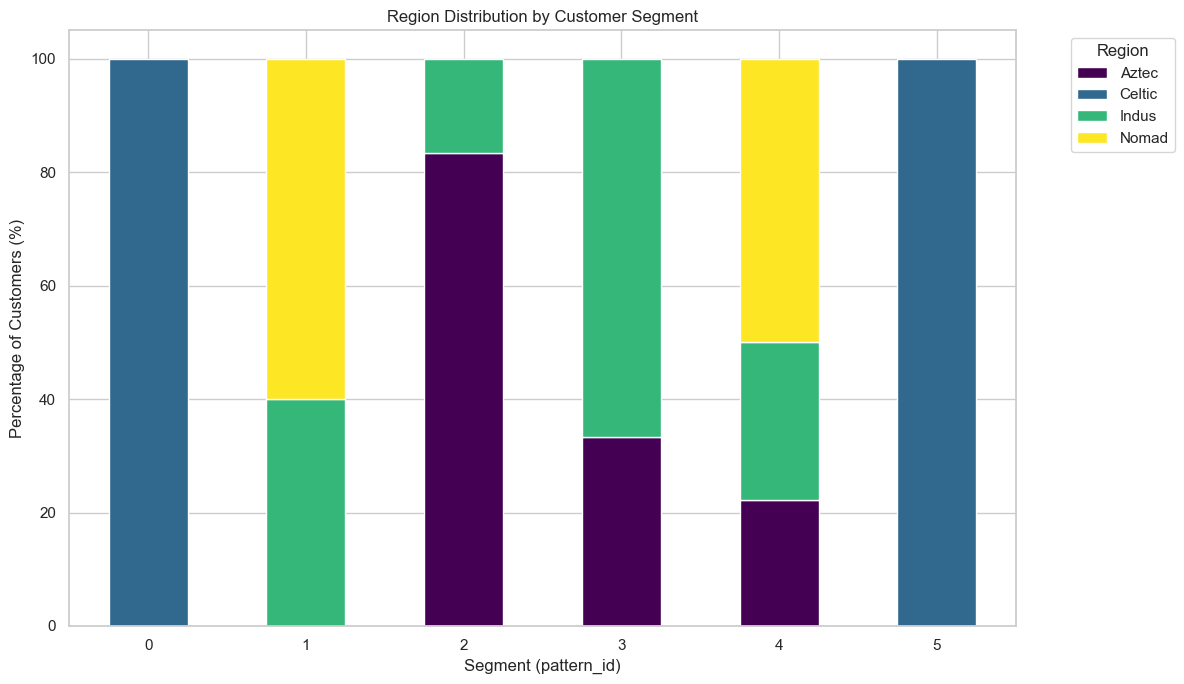


--- Advanced Visualization: Scaled Features Scatter Plot ---


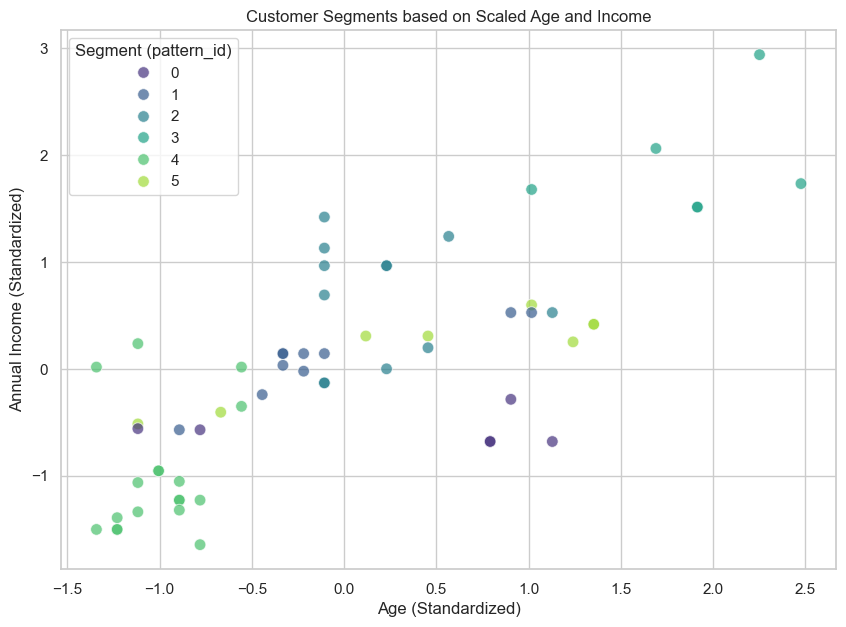


--- Predictive Model Insights: Feature Importance ---
2025-05-07 23:34:19,184 - JustTheGoodStuffNotebook - INFO - 712195783:258 - Successfully loaded transactions predictor model and preprocessor.
Feature Importances for Predicting Total Transactions:


,feature,importance
4,age,0.736692
1,region_Celtic,0.238124
0,region_Aztec,0.010948
3,region_Nomad,0.009462
2,region_Indus,0.004774


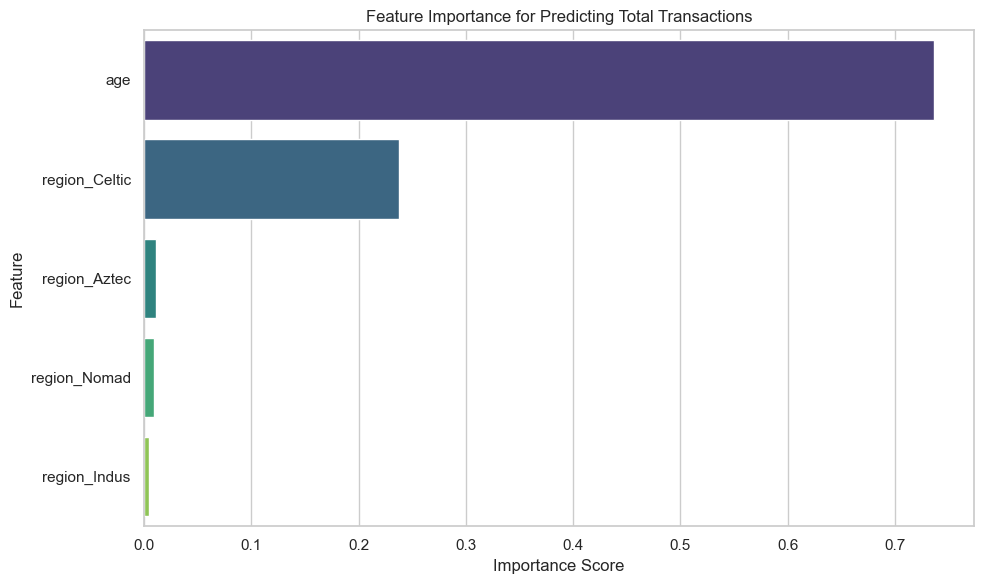


--- Propensity Model: Predicting Likely to Buy ---
2025-05-07 23:34:19,499 - JustTheGoodStuffNotebook - INFO - 712195783:307 - Created target 'likely_to_buy' based on median transactions (20)
2025-05-07 23:34:19,507 - JustTheGoodStuffNotebook - INFO - 712195783:325 - Loaded propensity model and scaler.

--- Propensity Model Evaluation (on original Test Set): ---
  Accuracy: 0.9167
  Classification Report:
                precision    recall  f1-score   support

Not Likely (0)       0.86      1.00      0.92         6
    Likely (1)       1.00      0.83      0.91         6

      accuracy                           0.92        12
     macro avg       0.93      0.92      0.92        12
  weighted avg       0.93      0.92      0.92        12

  Confusion Matrix:
[[6 0]
 [1 5]]

Feature Importances for Predicting Likelihood to Buy:


,feature,importance
1,annual_income,0.57641
0,age,0.42359


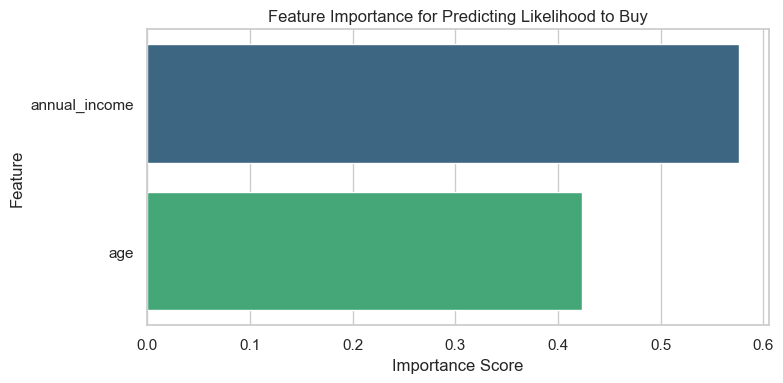


--- Analysis notebook execution finished. ---

--- Insights & Conclusion (Fill In Below) ---


In [1]:
# Combined code for JustTheGoodStuff.ipynb
# Includes optional setup/pipeline run, analysis, propensity model, and insights

# --- Cell 1: Setup & Imports ---
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from supabase import create_client, Client
import joblib
import subprocess
from IPython.display import display # Ensure display is imported
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # Added Classifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Added Scaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix # Added classification metrics

print("--- Running All Analysis Steps --- ")

# Add project root to path
project_root = os.path.abspath('.')
src_path = os.path.join(project_root, 'src')
if project_root not in sys.path: sys.path.insert(0, project_root)
if src_path not in sys.path: sys.path.insert(0, src_path)

# Import config and logger
try:
    import config
    from src import snh_logger as snh_logging
    logger = snh_logging.get_logger("JustTheGoodStuffNotebook")
except ImportError as e:
    print(f"Error importing project modules: {e}. Using fallback logger.")
    import logging
    logger = logging.getLogger("JustTheGoodStuffNotebook_Fallback")
    logger.addHandler(logging.StreamHandler(sys.stdout)); logger.setLevel(logging.INFO)

# Configure plotting style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
logger.info("Imports and setup complete.")

# --- Cell 1.1: (Optional) Run Setup and Full Data Pipeline ---
print("\n--- Optional Setup & Pipeline Execution ---")
run_setup = False # Set to True to run setup.py first
run_pipeline = False # Set to True to run the full process.py pipeline

def run_script(script_name):
    python_executable = sys.executable 
    command = [python_executable, script_name]
    try:
        print(f"Running script: {' '.join(command)}...")
        result = subprocess.run(command, capture_output=True, text=True, check=True, cwd=project_root)
        print(f"--- {script_name} stdout: ---")
        print(result.stdout)
        if result.stderr:
             print(f"--- {script_name} stderr: ---")
             print(result.stderr)
        print(f"--- {script_name} execution complete. ---")
        return True
    except FileNotFoundError:
        print(f"ERROR: '{python_executable}' command not found or script '{script_name}' not found.")
        return False
    except subprocess.CalledProcessError as e:
        print(f"ERROR: {script_name} failed with exit code {e.returncode}")
        print(f"--- {script_name} stdout (error): ---")
        print(e.stdout)
        print(f"--- {script_name} stderr (error): ---")
        print(e.stderr)
        return False
    except Exception as e:
        print(f"An unexpected error occurred while running {script_name}: {e}")
        return False

# Execution Control
setup_success = True
if run_setup:
    print("*** Executing setup.py ***")
    setup_success = run_script('setup.py')
    if not setup_success: print("Halting due to setup.py failure.")
    else: print("*** Setup script finished. ***")
else:
    print("Setup execution skipped (run_setup=False).")

pipeline_run_needed = run_pipeline and setup_success

if pipeline_run_needed:
     print("\n*** Executing process.py (Full Pipeline) ***")
     pipeline_success = run_script('process.py')
     if not pipeline_success: print("Pipeline execution failed.")
     else: print("*** Full pipeline execution finished. ***")
elif run_pipeline and not setup_success:
    print("Skipped pipeline execution because setup failed.")
else:
    print("\nPipeline execution skipped (run_pipeline=False).")

if not run_setup and not run_pipeline:
     print("Setup and Pipeline execution skipped (set flags in cell to execute).")

# --- Cell 2: Configuration & Supabase Connection ---
print("\n--- Connecting to Supabase ---")
supabase: Client | None = None
try:
    if not config.SUPABASE_URL or not config.SUPABASE_SERVICE_ROLE:
        logger.error("Supabase URL or Service Role not found in config.")
    else:
        supabase = create_client(config.SUPABASE_URL, config.SUPABASE_SERVICE_ROLE)
        logger.info("Supabase client initialized successfully.")
except Exception as e:
    logger.error(f"Failed to initialize Supabase client: {e}")
CLEANED_TABLE = 'cleaned_customer_data'
SEGMENTS_TABLE = 'customer_segments'
TRANSFORMED_TABLE = 'transformed_customer_data'
PREDICTIONS_TABLE = 'transaction_predictions'
logger.info(f"Supabase client initialized status: {supabase is not None}")

# --- Cell 3: Load Data from Supabase ---
print("\n--- Loading Data ---")
def fetch_data(supabase_client: Client, table_name: str, select_cols: str = "*") -> pd.DataFrame:
    df = pd.DataFrame() # Initialize empty DataFrame
    if not supabase_client: logger.error("Supabase client is not initialized."); return df
    try:
        logger.info(f"Fetching data from {table_name}... ({select_cols})")
        response = supabase_client.table(table_name).select(select_cols).execute()
        if response.data:
            df = pd.DataFrame(response.data)
            logger.info(f"Successfully fetched {len(df)} rows from {table_name}.")
        else: logger.warning(f"No data returned from {table_name}. Check if pipeline ran correctly.")
    except Exception as e: logger.error(f"Error fetching data from {table_name}: {e}")
    return df

cleaned_df = fetch_data(supabase, CLEANED_TABLE)
segments_df = fetch_data(supabase, SEGMENTS_TABLE, "customer_id, pattern_id")
transformed_df = fetch_data(supabase, TRANSFORMED_TABLE)
predictions_df = fetch_data(supabase, PREDICTIONS_TABLE)

# Basic type conversion
if not cleaned_df.empty:
    cleaned_df['age'] = pd.to_numeric(cleaned_df['age'], errors='coerce').astype('Int64')
    cleaned_df['annual_income'] = pd.to_numeric(cleaned_df['annual_income'], errors='coerce')
    cleaned_df['total_transactions'] = pd.to_numeric(cleaned_df['total_transactions'], errors='coerce').astype('Int64')
    cleaned_df['customer_id'] = cleaned_df['customer_id'].astype(str)
    cleaned_df['region'] = cleaned_df['region'].astype(str)
if not segments_df.empty:
    segments_df['customer_id'] = segments_df['customer_id'].astype(str)
    segments_df['pattern_id'] = pd.to_numeric(segments_df['pattern_id'], errors='coerce').astype('Int64') 
if not transformed_df.empty:
    transformed_df['customer_id'] = transformed_df['customer_id'].astype(str)
    for col in transformed_df.columns:
        if col != 'customer_id' and col != 'transformed_at':
             transformed_df[col] = pd.to_numeric(transformed_df[col], errors='coerce')
if not predictions_df.empty:
    predictions_df['customer_id'] = predictions_df['customer_id'].astype(str)
    predictions_df['predicted_total_transactions'] = pd.to_numeric(predictions_df['predicted_total_transactions'], errors='coerce')
logger.info(f"Data loading complete. Cleaned: {cleaned_df.shape}, Segments: {segments_df.shape}")

# --- Cell 4: Merge Data for Analysis ---
print("\n--- Merging Data ---")
merged_df = pd.DataFrame() # Initialize as empty
if not cleaned_df.empty and not segments_df.empty:
    merged_df = pd.merge(cleaned_df, segments_df, on='customer_id', how='left')
    if 'pattern_id' in merged_df.columns and not merged_df['pattern_id'].isnull().all():
        merged_df['pattern_id'] = pd.Categorical(merged_df['pattern_id'])
        logger.info(f"Merged data shape: {merged_df.shape}")
        print("--- Merged Data Head: ---")
        display(merged_df.head())
        print("\n--- Merged Data Info: ---")
        merged_df.info()
    else: logger.warning("Merge completed, but 'pattern_id' column is missing or all null.")
else: logger.error("Could not merge dataframes, cleaned_df or segments_df is empty.")
logger.info(f"Data merging complete. Final merged shape: {merged_df.shape}")

# --- Cell 5.1: Segment Sizes ---
print("\n--- Segment Analysis: Sizes ---")
if not merged_df.empty and 'pattern_id' in merged_df.columns and merged_df['pattern_id'].notna().any():
    segment_counts = merged_df['pattern_id'].value_counts().sort_index()
    print("Segment Sizes (Value Counts):")
    display(segment_counts)
    plt.figure(figsize=(8, 5))
    sns.countplot(data=merged_df.dropna(subset=['pattern_id']), x='pattern_id', hue='pattern_id', palette='viridis', order=segment_counts.index, legend=False)
    plt.title('Customer Count per Segment (pattern_id)')
    plt.xlabel('Segment (pattern_id)')
    plt.ylabel('Number of Customers')
    plt.show()
else: logger.warning("Cannot analyze segment sizes.")

# --- Cell 5.2: Feature Analysis by Segment (Numerical) ---
print("\n--- Segment Analysis: Numerical Features ---")
numerical_features = ['age', 'annual_income', 'total_transactions']
if not merged_df.empty and 'pattern_id' in merged_df.columns and merged_df['pattern_id'].notna().any():
    valid_numerical_features = []
    for col in numerical_features:
         if col in merged_df.columns:
              merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
              valid_numerical_features.append(col)
         else: logger.warning(f"Numerical feature '{col}' not found for summary stats.")
    if merged_df['pattern_id'].notna().any() and valid_numerical_features:
        segment_summary = merged_df.groupby('pattern_id', observed=False)[valid_numerical_features].agg(['mean', 'median', 'std', 'count'])
        print("Summary Statistics by Segment:")
        display(segment_summary.style.format("{:.2f}"))
    else: logger.warning("Cannot group for summary stats.")
    for col in valid_numerical_features:
         plt.figure(figsize=(10, 6))
         plot_order = sorted(merged_df['pattern_id'].cat.categories) if isinstance(merged_df['pattern_id'].dtype, pd.CategoricalDtype) else None
         sns.boxplot(data=merged_df, x='pattern_id', y=col, hue='pattern_id', palette='viridis', order=plot_order, legend=False)
         plt.title(f'Distribution of {col} by Segment (pattern_id)')
         plt.xlabel('Segment (pattern_id)')
         plt.ylabel(col)
         plt.show()
else: logger.warning("Cannot calculate or visualize segment summary statistics.")

# --- Cell 5.3: Region Analysis by Segment ---
print("\n--- Segment Analysis: Region Distribution ---")
if not merged_df.empty and 'pattern_id' in merged_df.columns and 'region' in merged_df.columns and merged_df['pattern_id'].notna().any():
    region_distribution_norm = pd.crosstab(merged_df['pattern_id'], merged_df['region'], normalize='index') * 100
    print("Region Distribution (%) within each Segment:")
    display(region_distribution_norm.style.format("{:.1f}%"))
    region_distribution_norm.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
    plt.title('Region Distribution by Customer Segment')
    plt.xlabel('Segment (pattern_id)')
    plt.ylabel('Percentage of Customers (%)')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else: logger.warning("Cannot analyze region distribution.")

# --- Cell 6: Visualization (Optional Advanced Plots) ---
print("\n--- Advanced Visualization: Scaled Features Scatter Plot ---")
if not transformed_df.empty and not segments_df.empty:
    plot_df = pd.merge(transformed_df, segments_df, on='customer_id', how='left')
    if 'pattern_id' in plot_df.columns and not plot_df['pattern_id'].isnull().all():
        plot_df['pattern_id'] = pd.Categorical(plot_df['pattern_id'])
        if 'age_scaled' in plot_df.columns and 'annual_income_scaled' in plot_df.columns:
            plt.figure(figsize=(10, 7))
            sns.scatterplot(data=plot_df.dropna(subset=['pattern_id']),
                            x='age_scaled', y='annual_income_scaled',
                            hue='pattern_id', palette='viridis', s=70, alpha=0.7)
            plt.title('Customer Segments based on Scaled Age and Income')
            plt.xlabel('Age (Standardized)')
            plt.ylabel('Annual Income (Standardized)')
            plt.legend(title='Segment (pattern_id)')
            plt.show()
        else: logger.warning("Scaled columns not found. Skipping scatter plot.")
    else: logger.warning("Segment IDs missing/null after merge, skipping scatter plot.")
else: logger.warning("Transformed/segment data not loaded/empty, skipping scatter plot.")

# --- Cell 7: Predictive Model Insights (Optional) ---
print("\n--- Predictive Model Insights: Feature Importance ---")
model_dir = config.MODEL_OUTPUT_DIR if hasattr(config, 'MODEL_OUTPUT_DIR') else 'models'
model_filename = os.path.join(model_dir, "transactions_predictor_model.joblib")
preprocessor_filename = os.path.join(model_dir, "transactions_predictor_preprocessor.joblib")
try:
    rf_model = joblib.load(model_filename)
    preprocessor = joblib.load(preprocessor_filename)
    logger.info("Successfully loaded transactions predictor model and preprocessor.")
    if hasattr(rf_model, 'feature_importances_'):
        try:
             ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['region'])
             if hasattr(preprocessor, 'feature_names_in_'):
                 input_features = preprocessor.feature_names_in_
                 original_cat_cols = preprocessor.transformers_[0][2]
                 passthrough_features = [col for col in input_features if col not in original_cat_cols]
                 processed_feature_names = np.concatenate([ohe_feature_names, passthrough_features])
             else:
                  passthrough_features = ['age'] # Fallback
                  processed_feature_names = np.concatenate([ohe_feature_names, passthrough_features])
        except Exception as e_feat:
             logger.warning(f"Could not get feature names from preprocessor: {e_feat}")
             num_features = len(rf_model.feature_importances_)
             processed_feature_names = [f'feature_{i}' for i in range(num_features)]
        importances = rf_model.feature_importances_
        if len(processed_feature_names) == len(importances):
            feature_importance_df = pd.DataFrame({'feature': processed_feature_names, 'importance': importances})
            feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
            print("Feature Importances for Predicting Total Transactions:")
            display(feature_importance_df)
            plt.figure(figsize=(10, 6))
            sns.barplot(data=feature_importance_df, x='importance', y='feature', hue='feature', palette='viridis', legend=False)
            plt.title('Feature Importance for Predicting Total Transactions')
            plt.xlabel('Importance Score')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.show()
        else: logger.warning(f"Mismatch between feature names ({len(processed_feature_names)}) and importances ({len(importances)}). Skipping plot.")
    else: logger.warning("Could not retrieve feature importances.")
except FileNotFoundError: logger.error(f"Model/preprocessor file not found. Ensure '{model_filename}' and '{preprocessor_filename}' exist.")
except Exception as e: logger.error(f"Error loading/analyzing predictive model: {e}")

# --- Propensity Model Section ---
print("\n--- Propensity Model: Predicting Likely to Buy ---")
PROPENSITY_MODEL_NAME = "propensity_model_rfc.joblib"
PROPENSITY_SCALER_NAME = "propensity_scaler.joblib"
PROPENSITY_MODEL_PATH = os.path.join(model_dir, PROPENSITY_MODEL_NAME)
PROPENSITY_SCALER_PATH = os.path.join(model_dir, PROPENSITY_SCALER_NAME)
TARGET_COL_PROPENSITY = 'likely_to_buy' # Derived target
PROPENSITY_FEATURES = ['age', 'annual_income'] # Features used by this model

if not cleaned_df.empty:
    # Create target variable 'likely_to_buy'
    if 'total_transactions' in cleaned_df.columns:
        median_transactions = cleaned_df['total_transactions'].median()
        if not pd.isna(median_transactions):
            cleaned_df[TARGET_COL_PROPENSITY] = (cleaned_df['total_transactions'] > median_transactions).astype(int)
            logger.info(f"Created target '{TARGET_COL_PROPENSITY}' based on median transactions ({median_transactions:.0f})")
            
            # Prepare features (ensure types and handle NaNs)
            X_propensity = cleaned_df[PROPENSITY_FEATURES].copy()
            X_propensity['age'] = pd.to_numeric(X_propensity['age'], errors='coerce')
            X_propensity['annual_income'] = pd.to_numeric(X_propensity['annual_income'], errors='coerce')
            propensity_initial_rows = len(X_propensity)
            X_propensity.dropna(inplace=True)
            if len(X_propensity) < propensity_initial_rows:
                 logger.warning(f"Dropped {propensity_initial_rows - len(X_propensity)} rows with NaN in propensity features.")
            
            y_propensity = cleaned_df.loc[X_propensity.index, TARGET_COL_PROPENSITY] # Align target with potentially dropped feature rows

            if not X_propensity.empty:
                # Load the saved scaler and model
                try:
                    propensity_scaler = joblib.load(PROPENSITY_SCALER_PATH)
                    propensity_model = joblib.load(PROPENSITY_MODEL_PATH)
                    logger.info("Loaded propensity model and scaler.")

                    # Scale features
                    X_propensity_scaled = propensity_scaler.transform(X_propensity)

                    # Make predictions (optional - mainly for evaluation context here)
                    y_propensity_pred = propensity_model.predict(X_propensity_scaled)

                    # Display evaluation metrics based on original train/test split (more accurate)
                    # Re-run the split logic from propensity_model.py to get the same test set
                    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
                        cleaned_df[PROPENSITY_FEATURES].dropna(), # Use same dropped data as training
                        cleaned_df.loc[cleaned_df[PROPENSITY_FEATURES].dropna().index, TARGET_COL_PROPENSITY],
                        test_size=0.2, 
                        random_state=config.RANDOM_STATE, 
                        stratify=cleaned_df.loc[cleaned_df[PROPENSITY_FEATURES].dropna().index, TARGET_COL_PROPENSITY]
                    )
                    X_test_orig_scaled = propensity_scaler.transform(X_test_orig)
                    y_pred_test = propensity_model.predict(X_test_orig_scaled)
                    
                    print("\n--- Propensity Model Evaluation (on original Test Set): ---")
                    accuracy = accuracy_score(y_test_orig, y_pred_test)
                    report = classification_report(y_test_orig, y_pred_test, target_names=['Not Likely (0)', 'Likely (1)'], zero_division=0)
                    cm = confusion_matrix(y_test_orig, y_pred_test)
                    print(f"  Accuracy: {accuracy:.4f}")
                    print(f"  Classification Report:\n{report}")
                    print(f"  Confusion Matrix:\n{cm}")
                    
                    # Display feature importances
                    if hasattr(propensity_model, 'feature_importances_'):
                        propensity_importances = propensity_model.feature_importances_
                        propensity_feat_df = pd.DataFrame({'feature': PROPENSITY_FEATURES, 'importance': propensity_importances})
                        propensity_feat_df = propensity_feat_df.sort_values(by='importance', ascending=False)
                        print("\nFeature Importances for Predicting Likelihood to Buy:")
                        display(propensity_feat_df)
                        plt.figure(figsize=(8, 4))
                        sns.barplot(data=propensity_feat_df, x='importance', y='feature', hue='feature', palette='viridis', legend=False)
                        plt.title('Feature Importance for Predicting Likelihood to Buy')
                        plt.xlabel('Importance Score')
                        plt.ylabel('Feature')
                        plt.tight_layout()
                        plt.show()
                except FileNotFoundError:
                    logger.error(f"Propensity model/scaler files not found. Ensure '{PROPENSITY_MODEL_PATH}' and '{PROPENSITY_SCALER_PATH}' exist.")
                except Exception as e_prop:
                    logger.error(f"Error processing propensity model: {e_prop}")
            else:
                logger.warning("Propensity feature DataFrame is empty after dropping NaNs.")
        else:
            logger.error("Cannot create propensity target: median transactions is NaN.")
    else:
        logger.error("Cannot create propensity target: 'total_transactions' column missing from cleaned_df.")
else:
    logger.warning("Cleaned data is empty, skipping propensity modeling.")


print("\n--- Analysis notebook execution finished. ---")

# --- Cell 8: Insights & Conclusion (Placeholder - Needs Manual Input) ---
print("\n--- Insights & Conclusion (Fill In Below) ---")
# *   Summary of Segments: Briefly describe the key characteristics of each identified segment (pattern_id 0-5).
# *   Predictive Insights: Mention key findings from the RandomForestRegressor (e.g., feature importance).
# *   Propensity Insights: Mention findings from RandomForestClassifier (e.g., feature importance for likelihood to buy).
# *   Business Implications: Suggest potential business actions based on these segments and propensity.
# *   Future Work: Mention potential next steps.

